In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def mplaw(alpha):
    eps = 1e-4
    q = 1./alpha
    l_plus = (np.sqrt(q)+1)**2 
    l_minus = (1-np.sqrt(q))**2 
    l_range = np.arange(l_minus, l_plus+eps, eps)
    mp_vals = []
    for l in l_range:
        num = np.sqrt(4*l*q- (l-1+q)**2)
        den = 2*np.pi*(l*q)
        mp_vals.append(num/den)
    mp_vals = np.asarray(mp_vals)
    return l_range, mp_vals

In [3]:
def normalize_matrix(matrix):
    test = np.copy(matrix)
    test = test.T
    for i in range(test.shape[0]):
        mean = np.average(test[i])
        var = np.average(np.square(test[i]))
        test[i] = test[i] - mean
        test[i] = test[i]/np.sqrt(var - mean*mean)
    return test.T

In [4]:
def compute_evals(matrix):
    c = matrix.T.dot(matrix)
    c = c/matrix.shape[0]
    w = np.linalg.eigvalsh(c)
    return w

In [5]:
def compute_evecs(matrix):
    c = matrix.T.dot(matrix)
    c = c/matrix.shape[0]
    w,v = np.linalg.eigh(c)
    return w,v

In [199]:
def compute_eigenvalues(fname):
    evals_raw_b = np.asarray([])
    evals_norm_b = np.asarray([])
    evals_raw_a = np.asarray([])
    evals_norm_a = np.asarray([])

#         fname = 'onewgd_m0/xi_data_1._20._200_gd'
#     print "Running for filename : {}".format(fname+str(i))
    xi = np.loadtxt(fname)
    xi_before = xi[:4000]
    xi_after = xi[-1*4000:]
    evals_raw_b = np.concatenate([evals_raw_b, compute_evals(xi_before)])
    evals_norm_b = np.concatenate([evals_norm_b, compute_evals(normalize_matrix(xi_before))])
    evals_raw_a = np.concatenate([evals_raw_a, compute_evals(xi_after)])
    evals_norm_a = np.concatenate([evals_norm_a, compute_evals(normalize_matrix(xi_after))])
    print "Size of evals_norm_a: {}".format(evals_norm_a.shape)
    return evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a

In [200]:
def compute_eigenvalues_average(fname):
    evals_raw_b = np.asarray([])
    evals_norm_b = np.asarray([])
    evals_raw_a = np.asarray([])
    evals_norm_a = np.asarray([])

    for i in range(1,11):
#         fname = 'onewgd_m0/xi_data_1._20._200_gd'
        print "Running for filename : {}".format(fname+str(i))
        xi = np.loadtxt(fname+str(i))
        xi_before = xi[:4000]
        xi_after = xi[-1*4000:]
        evals_raw_b = np.concatenate([evals_raw_b, compute_evals(xi_before)])
        evals_norm_b = np.concatenate([evals_norm_b, compute_evals(normalize_matrix(xi_before))])
        evals_raw_a = np.concatenate([evals_raw_a, compute_evals(xi_after)])
        evals_norm_a = np.concatenate([evals_norm_a, compute_evals(normalize_matrix(xi_after))])
        print "Size of evals_norm_a: {}".format(evals_norm_a.shape)
    return evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a

In [211]:
def plot_eigenvalues(evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a, sigma, pbar, save_name):
    plt.figure(figsize = (20,20), dpi = 200)
    l,m = mplaw(20)
    plt.subplot(221)
    plt.hist(evals_raw_b,density = True,bins=15, ec="k")
    plt.plot(l,m, 'r')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
    plt.xlabel('$\\lambda$', fontsize = 14)
    plt.title('Un-normalized (Before)', fontsize = 18)
    plt.legend()
    plt.subplot(222)
    plt.hist(evals_norm_b, density=True ,bins=15, ec="k")
    plt.plot(l,m, 'r')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
    plt.xlabel('$\\lambda$', fontsize = 14)
    plt.title('Normalized (Before)', fontsize = 18)
    plt.legend()
    plt.subplot(223)
    x1, y1, _ = plt.hist(evals_raw_a, density = True,bins = 15, ec="k")
    plt.plot(l,m, 'r')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
    plt.xlabel('$\\lambda$', fontsize = 14)
    plt.title('Un-normalized (After)', fontsize = 18)
    plt.legend()
    plt.subplot(224)
    x2, y2, _ = plt.hist(evals_norm_a,density=True, bins=15, ec="k")
    plt.plot(l,m, 'r')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
    plt.xlabel('$\\lambda$', fontsize = 14)
    plt.title('Normalized (After)', fontsize = 18)
    plt.legend()
    plt.suptitle('$\\alpha = 20.0$, $\\sigma$ = {}, m = {}'.format(sigma, pbar), fontsize = 26)
    plt.savefig(save_name+'.pdf')
    plt.savefig(save_name+'.png')

Running for filename : onewgd_m0/xi_data_-1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd2
Size of evals_norm_a: (400,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd3
Size of evals_norm_a: (600,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd4
Size of evals_norm_a: (800,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd5
Size of evals_norm_a: (1000,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd6
Size of evals_norm_a: (1200,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd7
Size of evals_norm_a: (1400,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd8
Size of evals_norm_a: (1600,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd9
Size of evals_norm_a: (1800,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd10
Size of evals_norm_a: (2000,)


/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


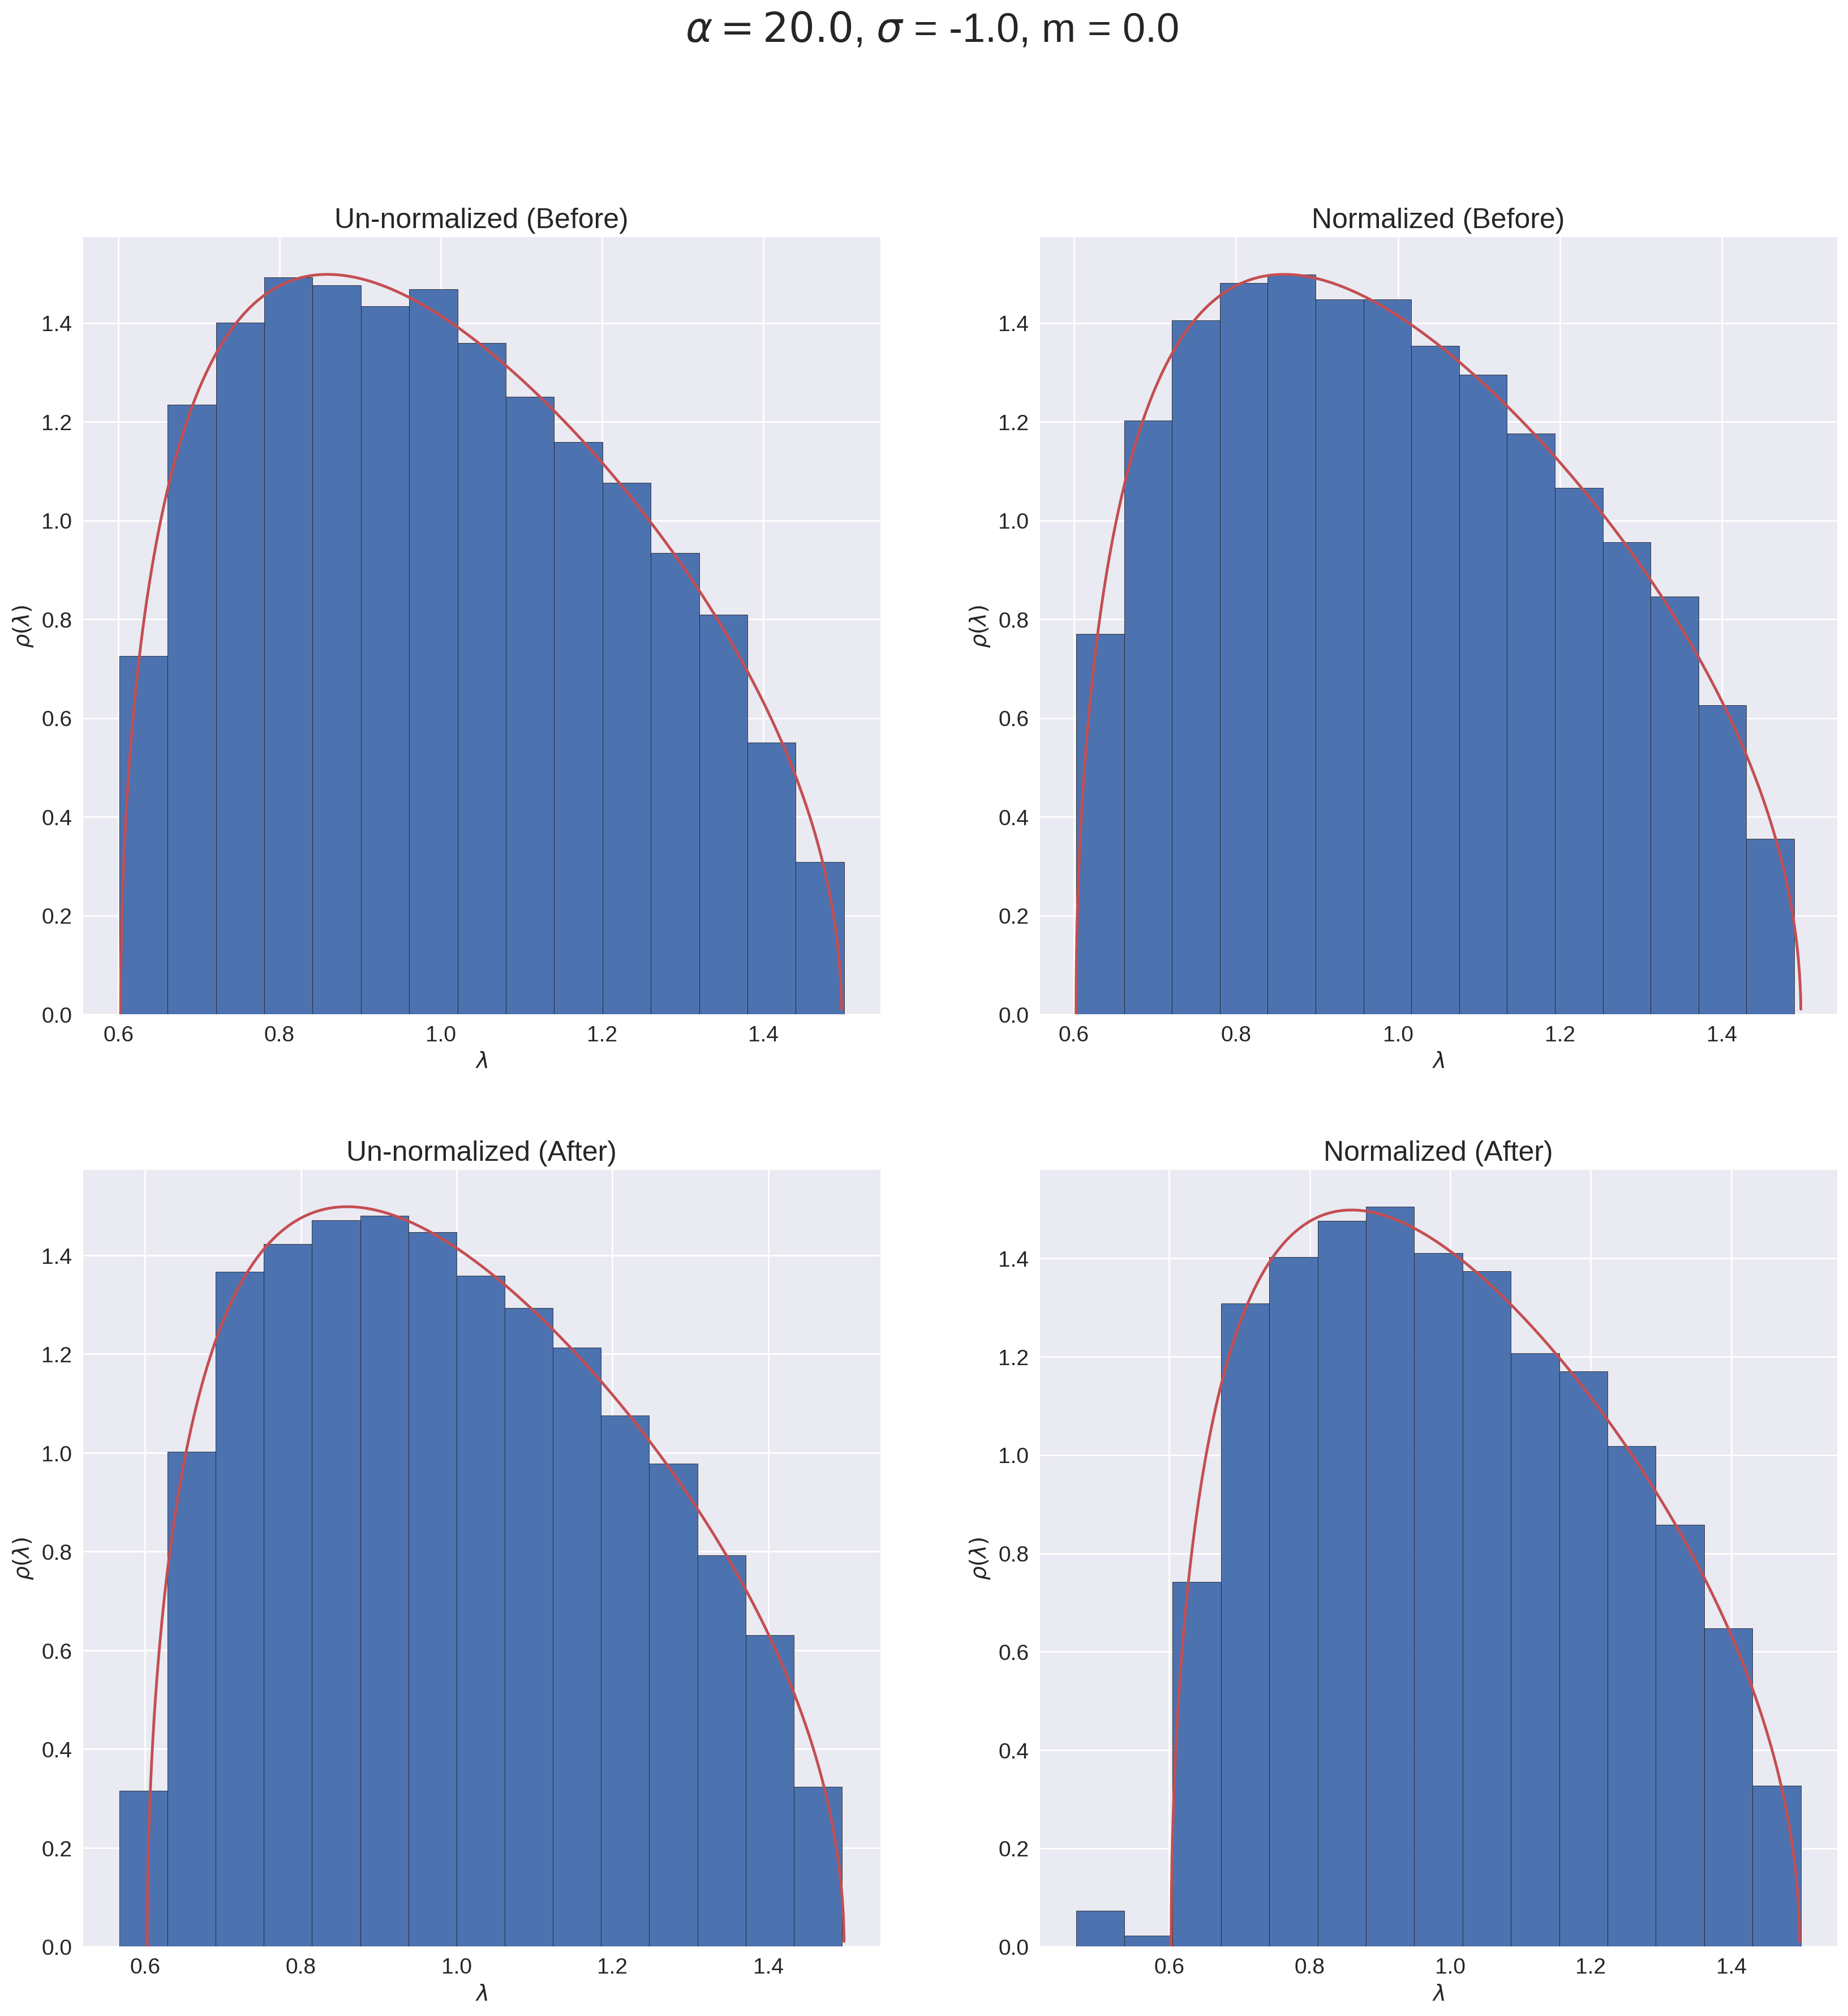

In [212]:
fname = 'onewgd_m0/xi_data_-1._20._200_gd'
evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a = compute_eigenvalues_average(fname)
plot_eigenvalues(evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a,-1.0, 0.0, 'plots/eigen_distrib_sigma_-1_m0')

Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd2
Size of evals_norm_a: (400,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd3
Size of evals_norm_a: (600,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd4
Size of evals_norm_a: (800,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd5
Size of evals_norm_a: (1000,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd6
Size of evals_norm_a: (1200,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd7
Size of evals_norm_a: (1400,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd8
Size of evals_norm_a: (1600,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd9
Size of evals_norm_a: (1800,)
Running for filename : onewgd_m0.57/xi_data_-1._20._200_gd10
Size of evals_norm_a: (2000,)


/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


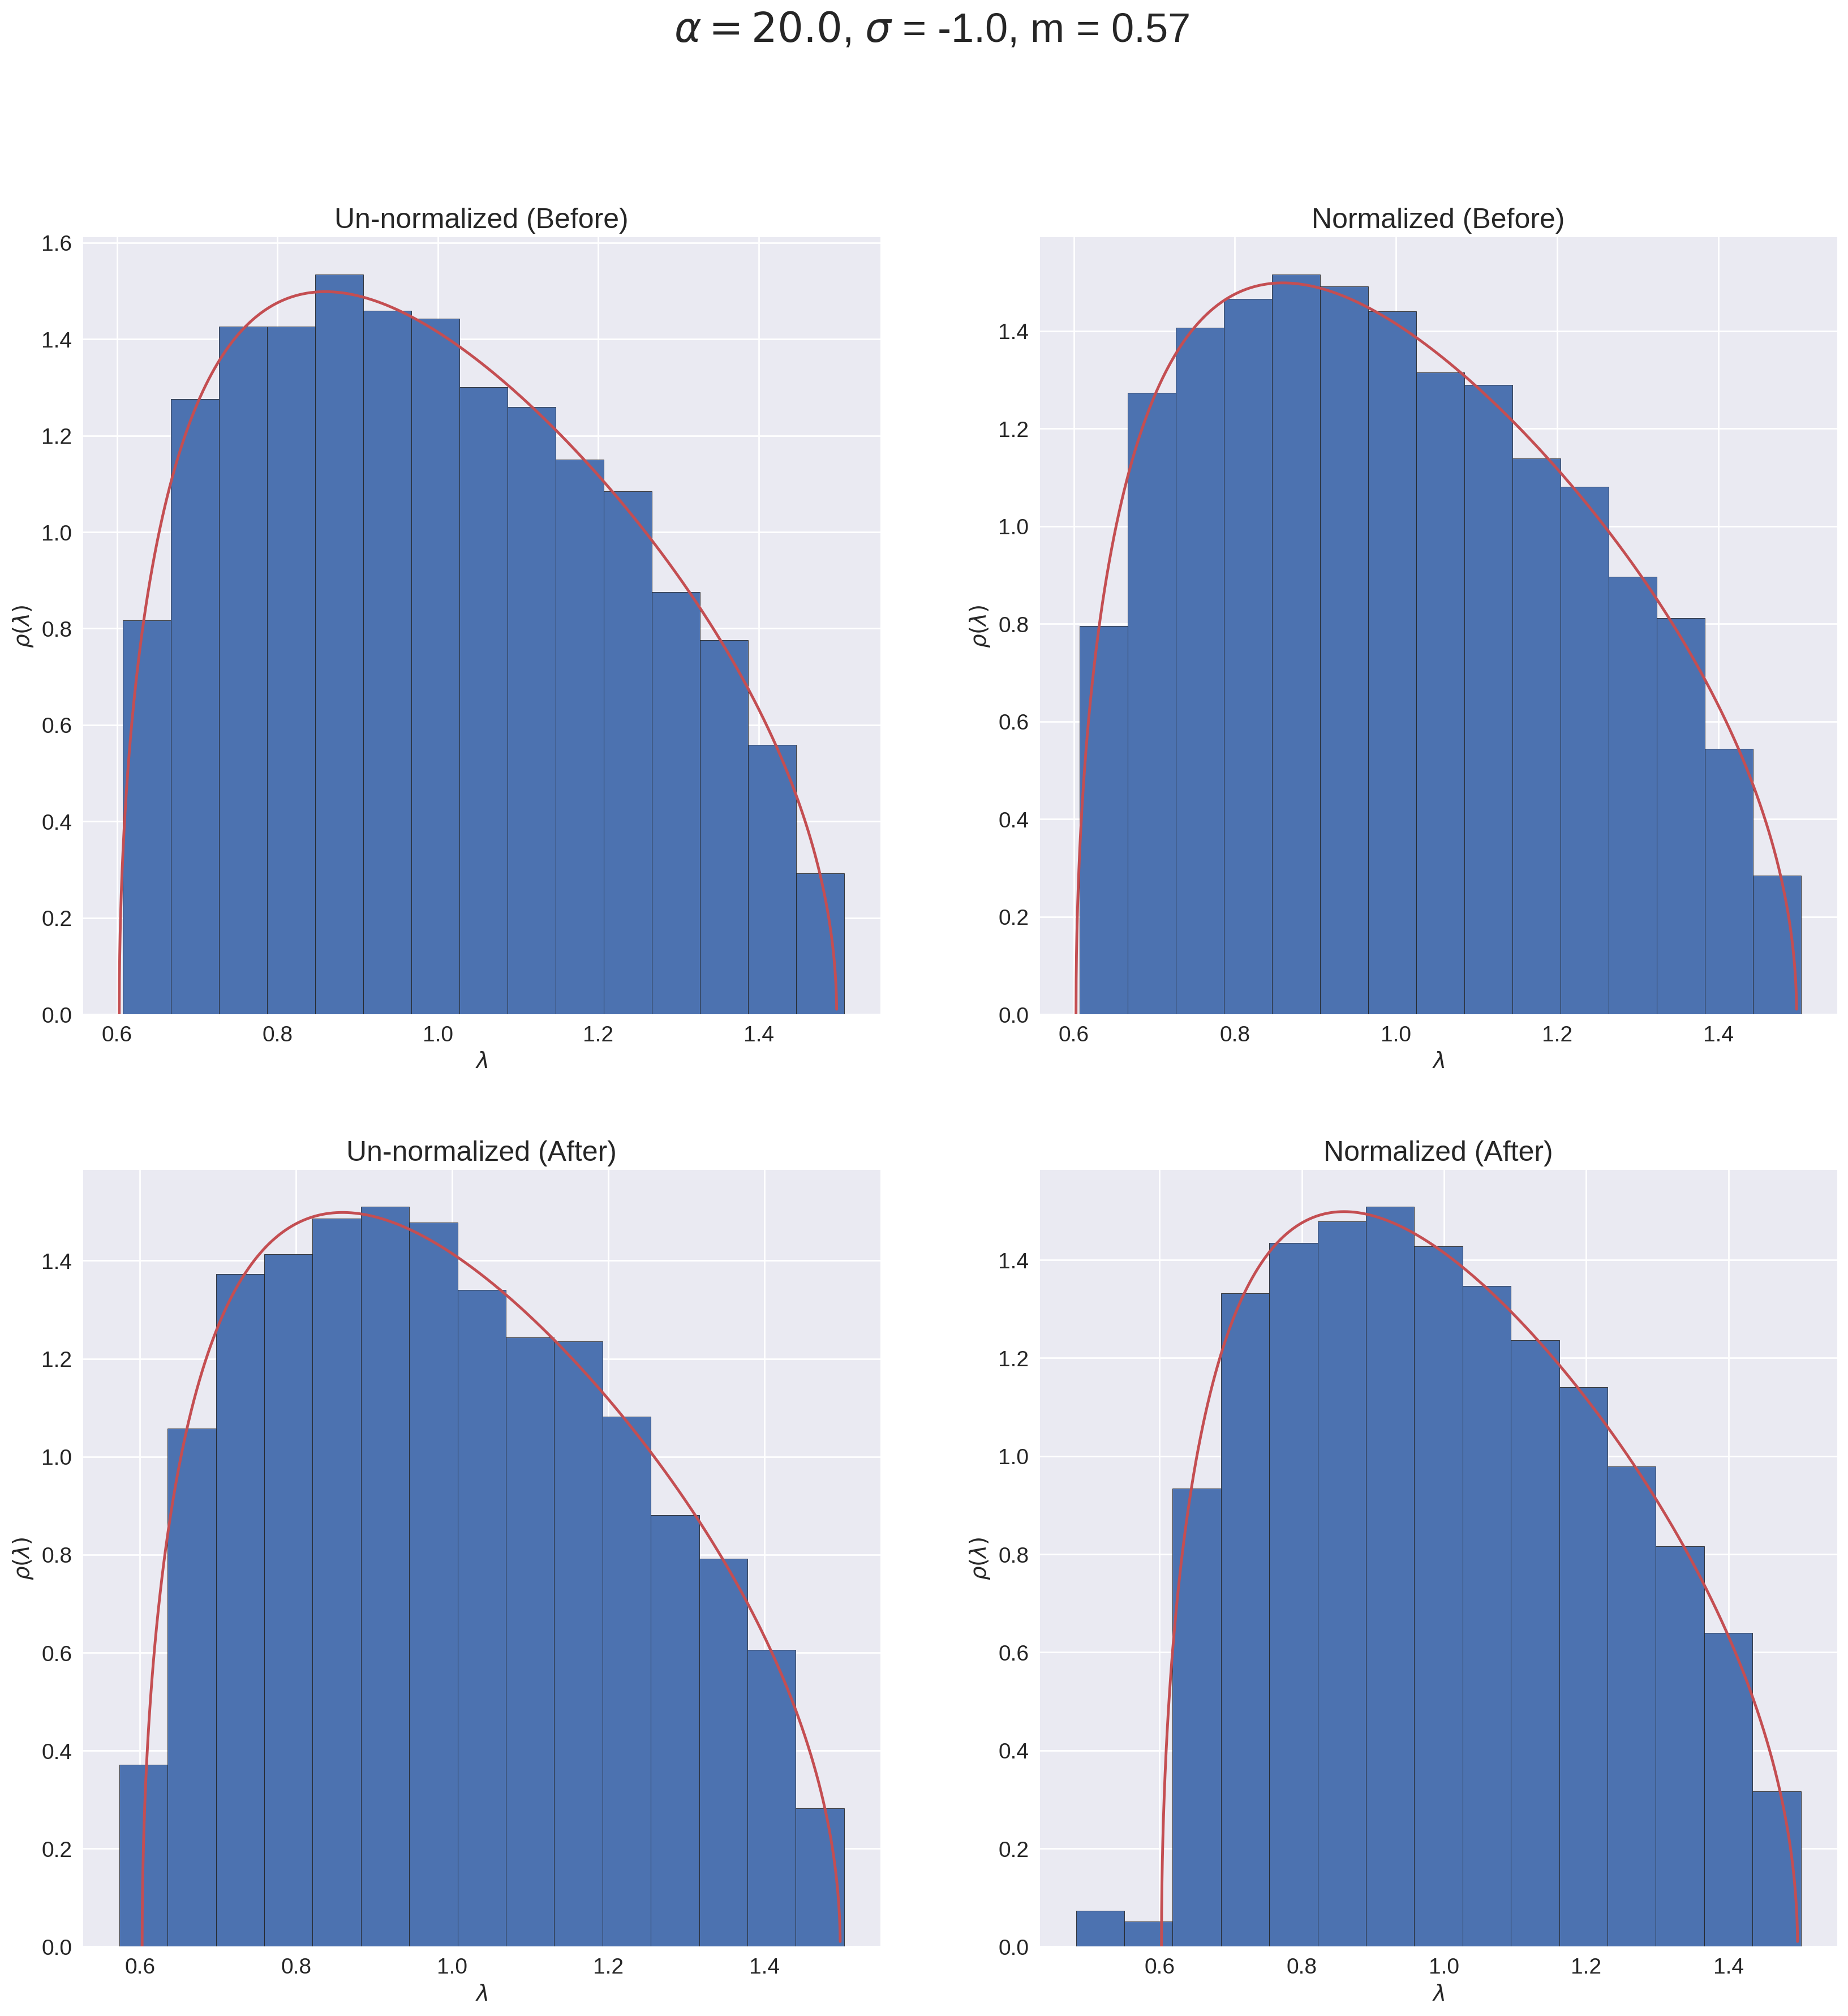

In [213]:
fname = 'onewgd_m0.57/xi_data_-1._20._200_gd'
evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a = compute_eigenvalues_average(fname)
plot_eigenvalues(evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a,-1.0, 0.57, 'plots/eigen_distrib_sigma_-1_m0.57')

Running for filename : onewgd_m0.57/xi_data_1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd2
Size of evals_norm_a: (400,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd3
Size of evals_norm_a: (600,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd4
Size of evals_norm_a: (800,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd5
Size of evals_norm_a: (1000,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd6
Size of evals_norm_a: (1200,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd7
Size of evals_norm_a: (1400,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd8
Size of evals_norm_a: (1600,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd9
Size of evals_norm_a: (1800,)
Running for filename : onewgd_m0.57/xi_data_1._20._200_gd10
Size of evals_norm_a: (2000,)


/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


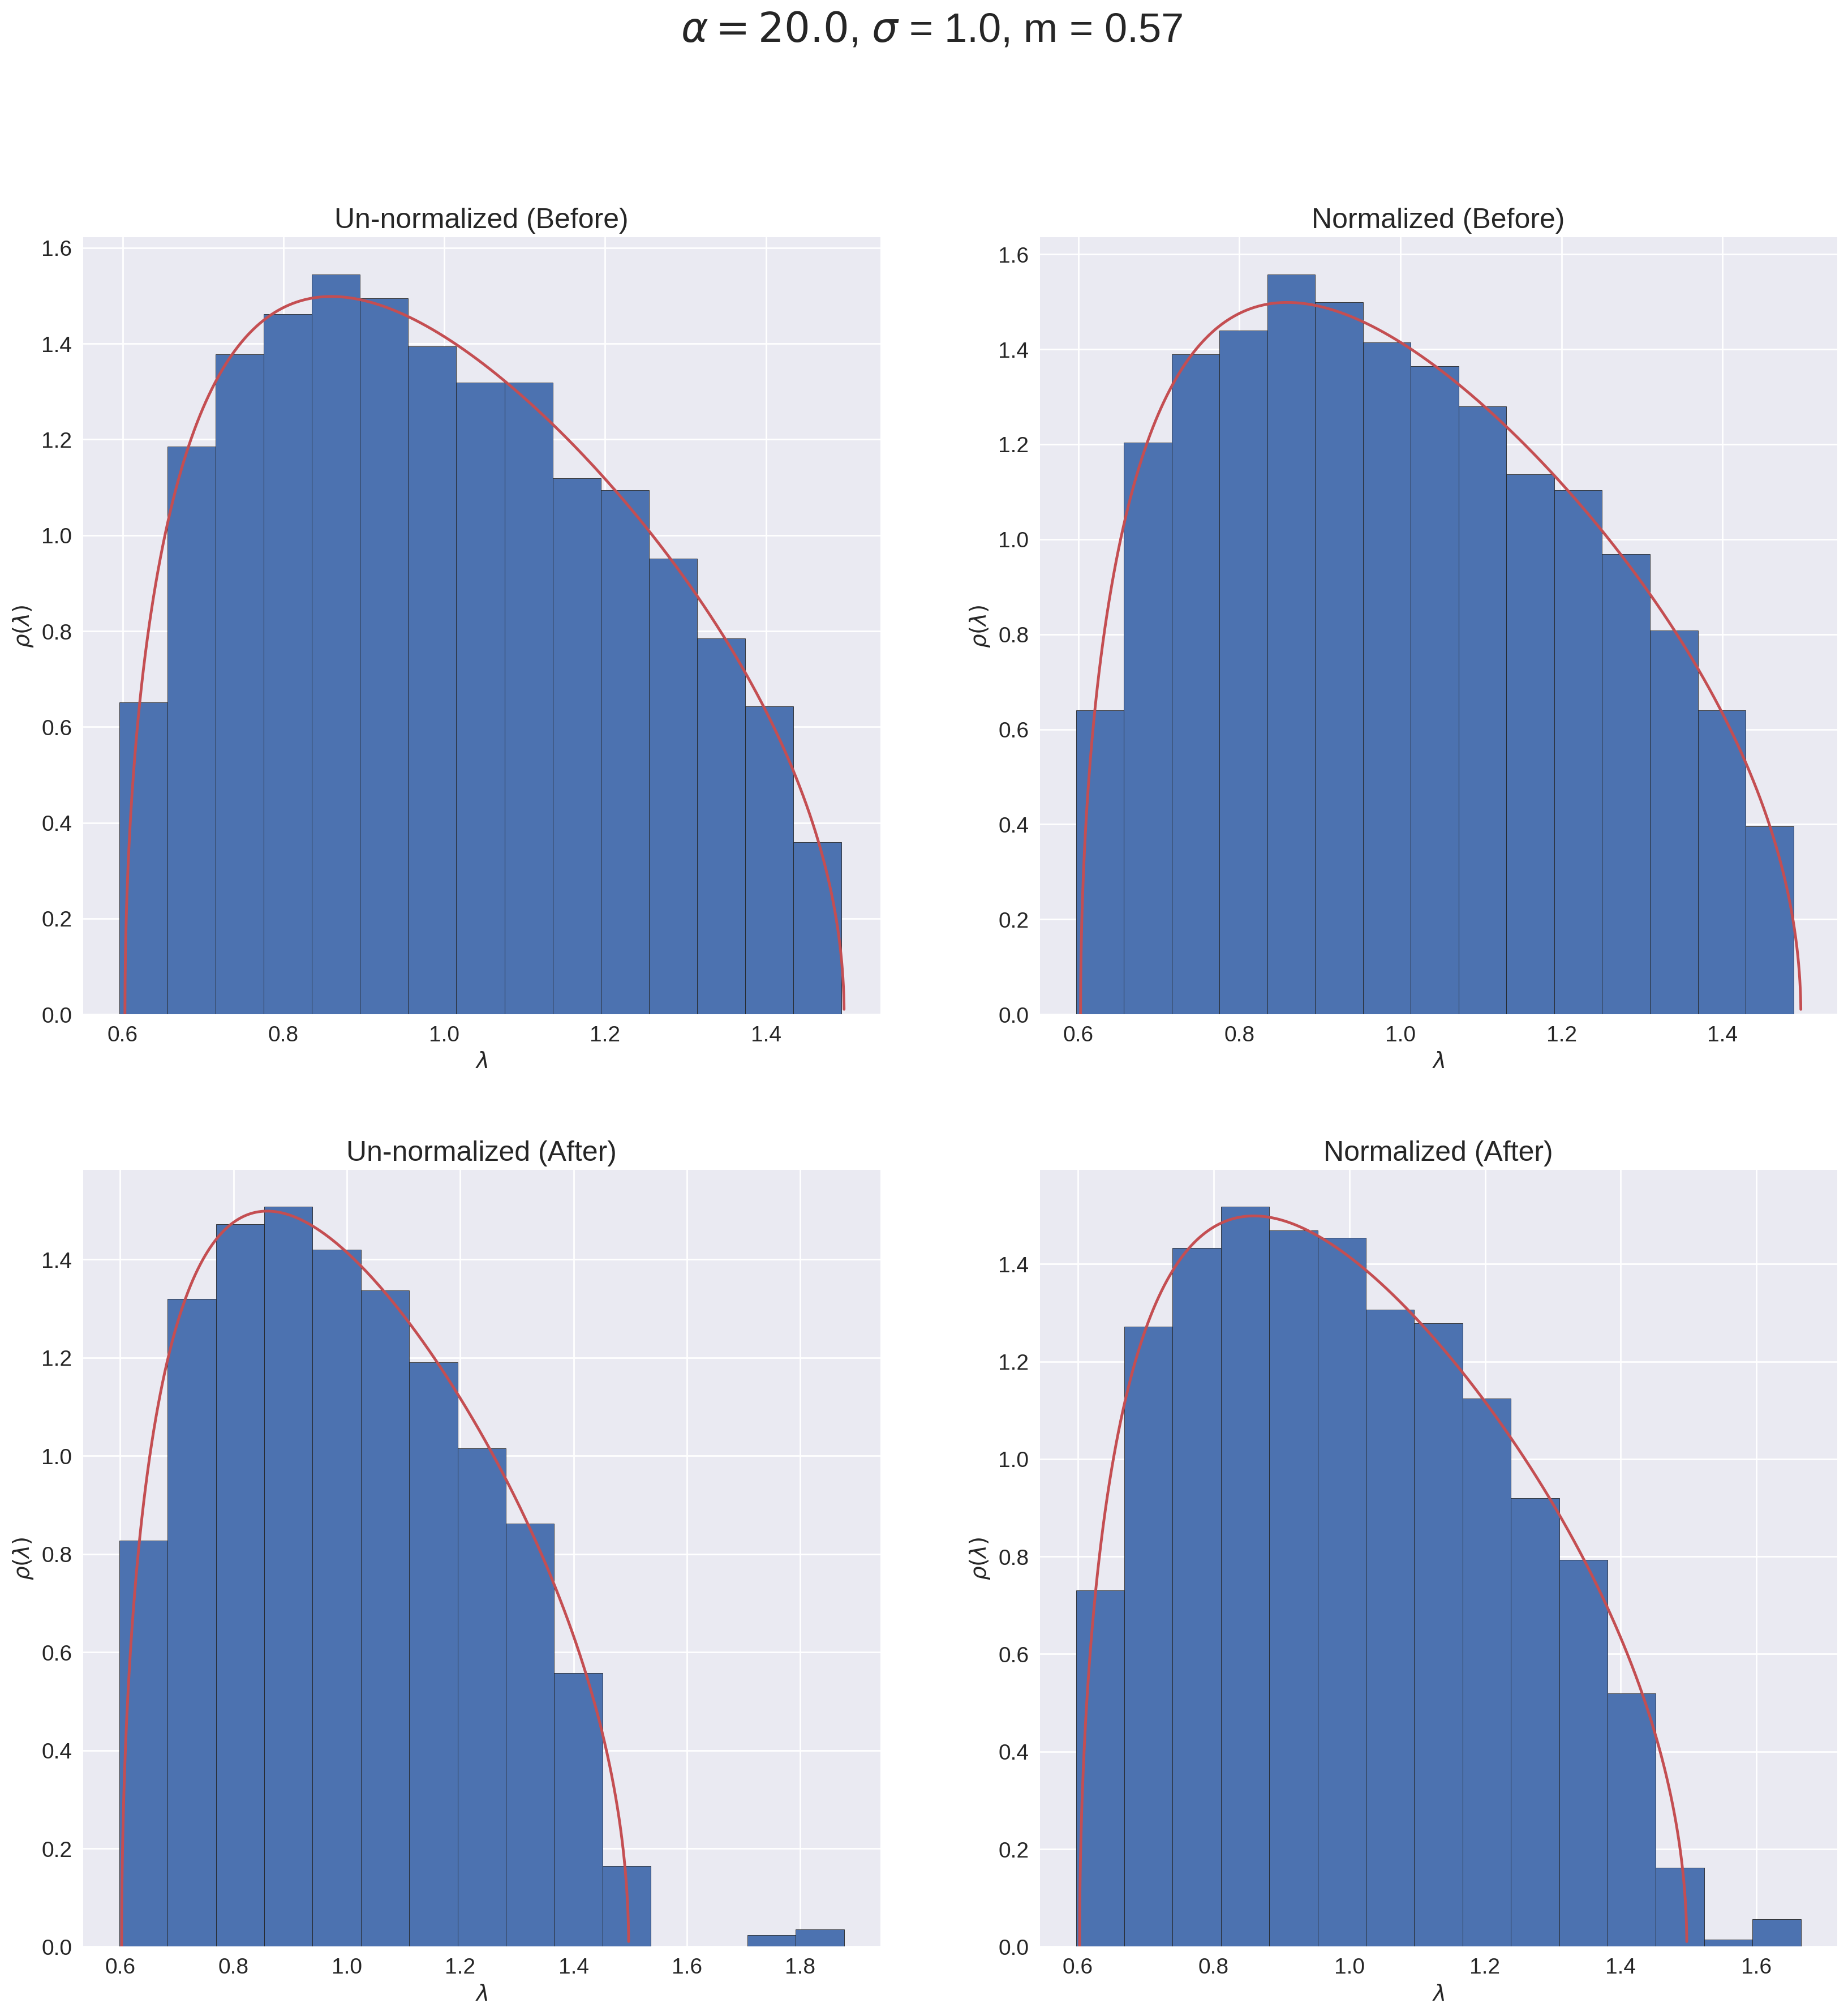

In [214]:
fname = 'onewgd_m0.57/xi_data_1._20._200_gd'
evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a = compute_eigenvalues_average(fname)
plot_eigenvalues(evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a,1.0, 0.57, 'plots/eigen_distrib_sigma_1_m0.57')

Running for filename : onewgd_m0/xi_data_1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd2
Size of evals_norm_a: (400,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd3
Size of evals_norm_a: (600,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd4
Size of evals_norm_a: (800,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd5
Size of evals_norm_a: (1000,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd6
Size of evals_norm_a: (1200,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd7
Size of evals_norm_a: (1400,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd8
Size of evals_norm_a: (1600,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd9
Size of evals_norm_a: (1800,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd10
Size of evals_norm_a: (2000,)


/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


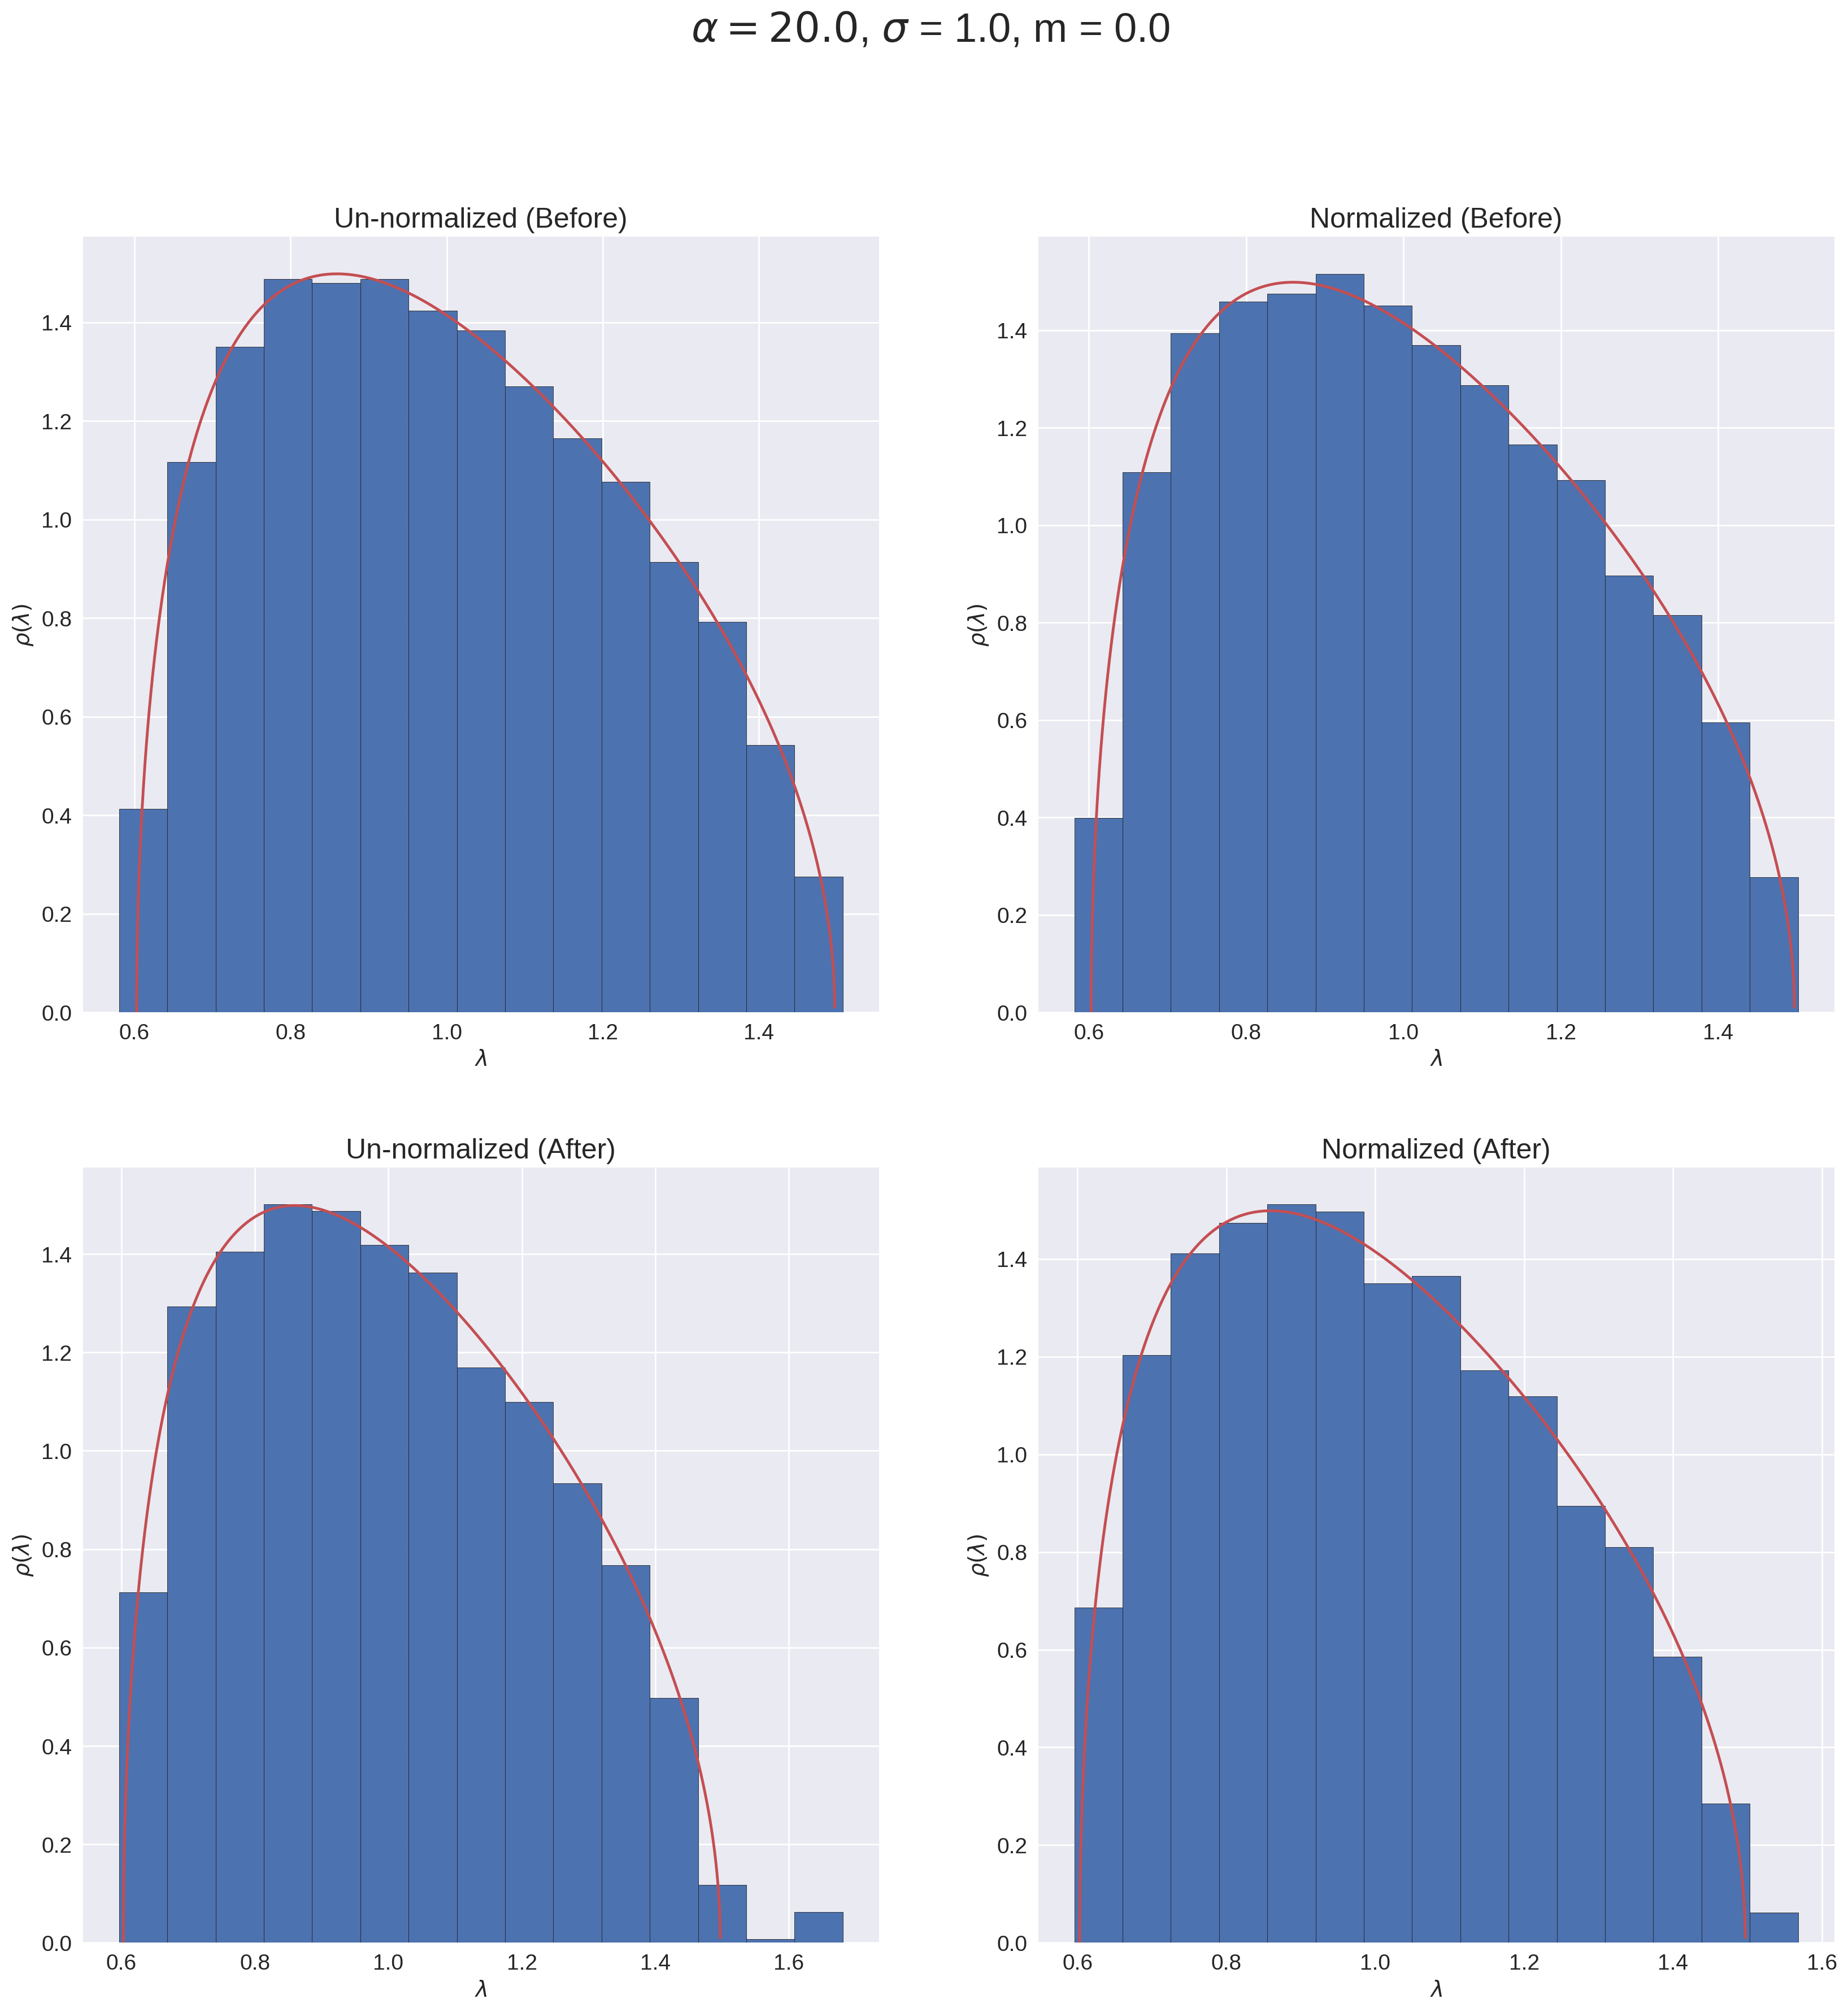

In [218]:
fname = 'onewgd_m0/xi_data_1._20._200_gd'
evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a = compute_eigenvalues_average(fname)
plot_eigenvalues(evals_raw_b, evals_norm_b, evals_raw_a, evals_norm_a,1.0, 0.0, 'plots/eigen_distrib_sigma_1_m0_t')

In [217]:
import os
os.getcwd()

'/users/sharma/Documents/phdcode/cpp_implementation/group_meeting_7_feb'

## Plot the outlying eigenplots 

### Global calculation 

1. Aggregate the data 
2. Plot only the normalized after data 


### Individual calculation 

1. Get the count and ecart for each of the after normalized eigenvalues 
2. Tabulate the count, value and ecart from the MP Law

## Global calculation

Rather than plotting the eigenvalues using the `plt.hist` procedure, lets check the `np.histogram` procedure and confirm that they give similar responses 

In [240]:
def get_hist(data, nbins=15): 
    histo, bin_edges = np.histogram(data,nbins)
    bin_center = 0.5*(bin_edges[1:] + bin_edges[:-1])
#     plt.step(bin_center,histo,where='mid')
#     plt.show()
#     width = np.diff(bin_edge)
#     center = (bins[:-1] + bins[1:]) / 2
    plt.bar(bin_center, histo, width = np.diff(bin_edges) , ec="k")
    return histo, bin_edges

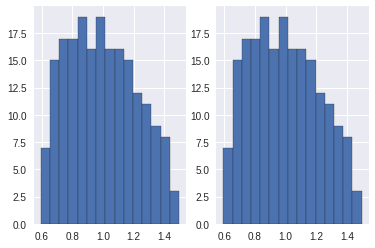

In [246]:
data = np.loadtxt('onewgd_m0.57/evals_nc_-1._20._200_gd1')
plt.subplot(121)
x1, y1, _ = plt.hist(data[-1], ec="k", bins=15)
plt.subplot(122)
x2, y2 = get_hist(data[-1])

**e_{i}** : eigenvalues at the end of r&r procedure using normalized matrix
1. **e1**: $\sigma = -1.0$, $m=0$
2. **e2** : $\sigma = 1.0$, $m=0$
and similarly for the $m=0.57$

In [263]:
_,_,_,e1 = compute_eigenvalues_average('onewgd_m0/xi_data_-1._20._200_gd')
_,_,_,e2 = compute_eigenvalues_average('onewgd_m0/xi_data_1._20._200_gd')
_,_,_,e3 = compute_eigenvalues_average('onewgd_m0.57/xi_data_-1._20._200_gd')
_,_,_,e4 = compute_eigenvalues_average('onewgd_m0.57/xi_data_1._20._200_gd')

Running for filename : onewgd_m0/xi_data_-1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd2
Size of evals_norm_a: (400,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd3
Size of evals_norm_a: (600,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd4
Size of evals_norm_a: (800,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd5
Size of evals_norm_a: (1000,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd6
Size of evals_norm_a: (1200,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd7
Size of evals_norm_a: (1400,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd8
Size of evals_norm_a: (1600,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd9
Size of evals_norm_a: (1800,)
Running for filename : onewgd_m0/xi_data_-1._20._200_gd10
Size of evals_norm_a: (2000,)
Running for filename : onewgd_m0/xi_data_1._20._200_gd1
Size of evals_norm_a: (200,)
Running for filename : onewgd_m0/xi_data_1._20._

/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


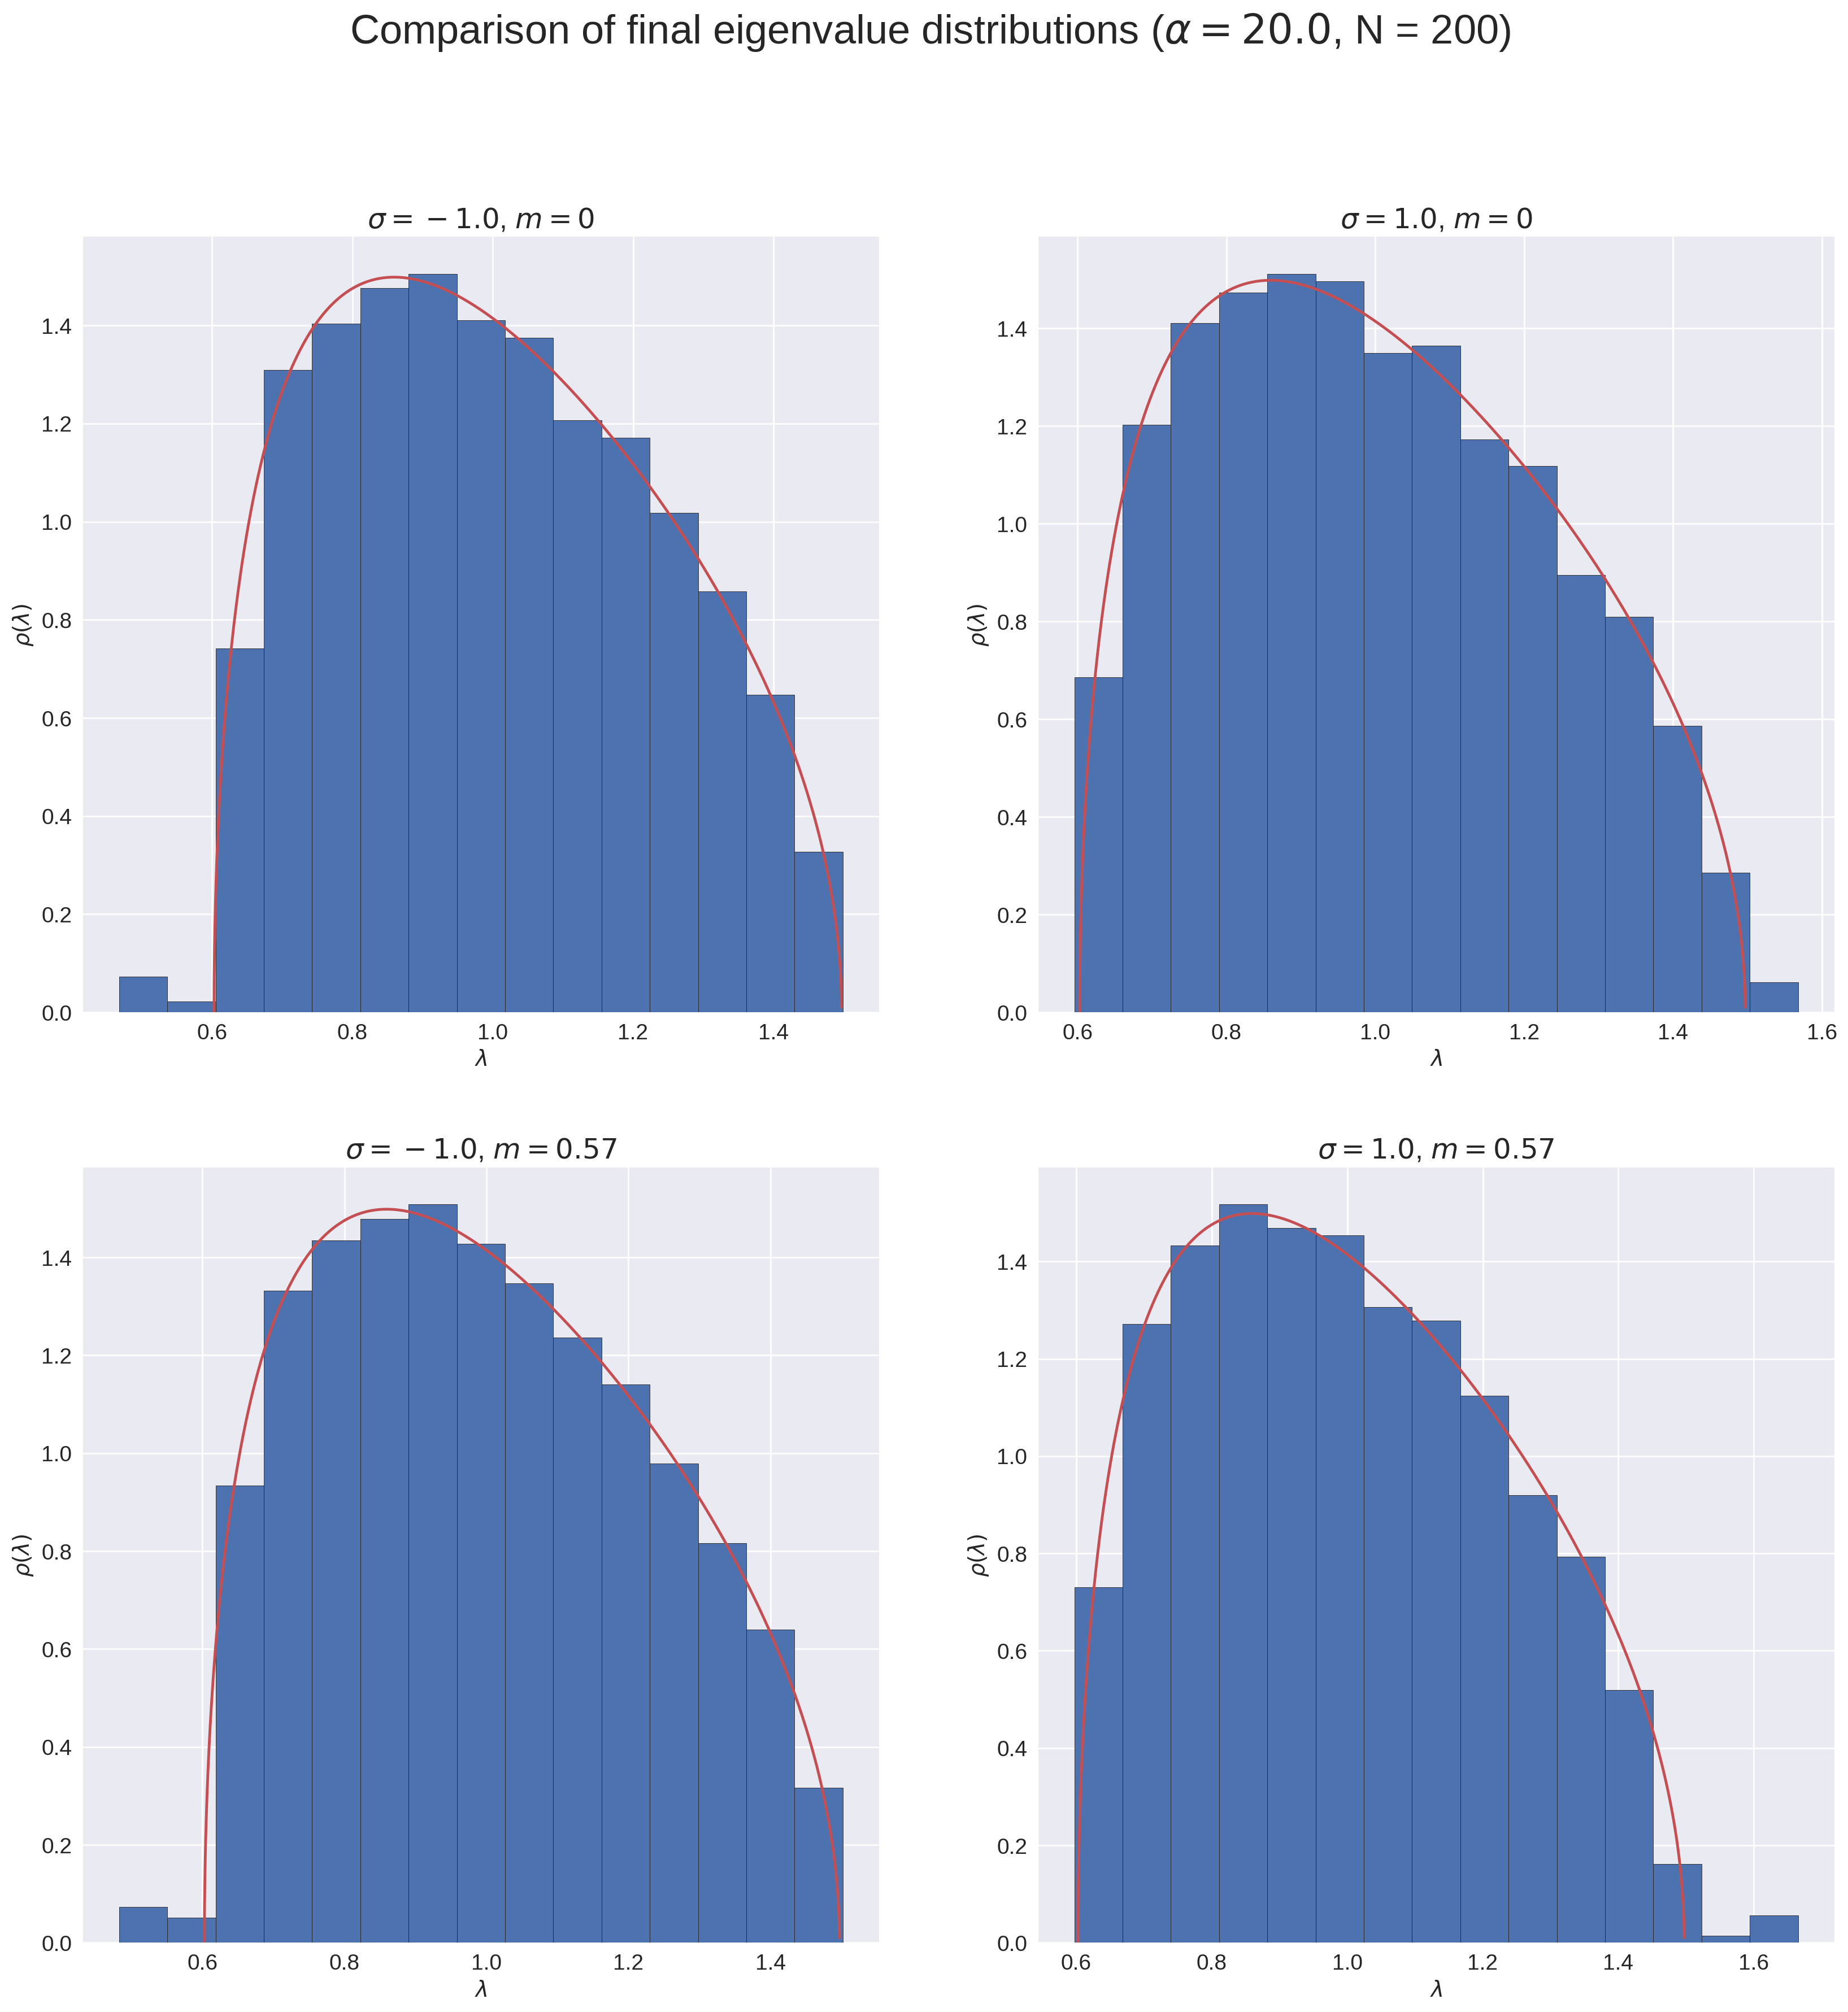

In [365]:
plt.figure(figsize = (20,20), dpi = 200)
l,m = mplaw(20)
plt.subplot(221)
plt.hist(e1,density = True,bins=15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = -1.0$, $m = 0$', fontsize = 18)
plt.legend()
plt.subplot(222)
plt.hist(e2, density=True ,bins=15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = 1.0$, $m = 0$', fontsize = 18)
plt.legend()
plt.subplot(223)
x1, y1, _ = plt.hist(e3, density = True,bins = 15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = -1.0$, $m = 0.57$', fontsize = 18)
plt.legend()
plt.subplot(224)
x2, y2, _ = plt.hist(e4,density=True, bins=15, ec="k")
plt.plot(l,m, 'r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel( '$\\rho (\\lambda)$', fontsize=14)
plt.xlabel('$\\lambda$', fontsize = 14)
plt.title('$\\sigma = 1.0$, $m = 0.57$', fontsize = 18)
plt.legend()
plt.suptitle('Comparison of final eigenvalue distributions ($\\alpha = 20.0$, N = 200)', fontsize = 26)
plt.savefig('plots/eigen_comparison_all.pdf')
plt.savefig('plots/eigen_comparison_all.png')

In [293]:
## Saving all normalized eigenvalues 
np.savetxt('all_evals.txt', [e1,e2,e3,e4])

In [347]:
def get_min_evals(data):
    indices = []
    vals = []
    for i in range(10):
        begin = i*200
        end = (i+1)*200
        x = np.where((data[begin:end] < l[0]))
        if x[0].size !=0:
            indices.append(x[0][0])
            vals.append(data[begin:end][x][0])
        else:
            indices.append(np.argmin(data[begin:end]))
            vals.append(np.min(data[begin:end]))
    return np.asarray(indices), np.asarray(vals)

def get_max_evals(data):
    indices = []
    vals = []
    for i in range(10):
        begin = i*200
        end = (i+1)*200
        x = np.where(data[begin:end]> l[-1])
        if x[0].size !=0:
            indices.append(x[0][0])
            vals.append(data[begin:end][x][0])
        else:
            indices.append(np.argmax(data[begin:end]))
            vals.append(np.max(data[begin:end]))
    return np.asarray(indices), np.asarray(vals)

In [348]:
x = np.where(e1[:200] > l[-1])
x[0].size

0

In [349]:
_, min_e1 = get_min_evals(e1)
_, max_e1 = get_max_evals(e1)
_, min_e2 = get_min_evals(e2)
_, max_e2 = get_max_evals(e2)
_, min_e3 = get_min_evals(e3)
_, max_e3 = get_max_evals(e3)
_, min_e4 = get_min_evals(e4)
_, max_e4 = get_max_evals(e4)

In [363]:
print np.average(l[0] - min_e1)
print np.average(l[0] - min_e3)
print np.average(max_e2 - l[-1])
print np.average(max_e4 - l[-1])

0.10753042190490751
0.10272836639716654
0.034077802952203105
0.1185009134736085


In [358]:
print l[0], l[-1]

0.6027864045000421 1.4972864044999437


In [262]:
for e in [e1,e2,e3,e4]:
    print np.min(e), l[0], np.max(e),l[-1]

0.46742574873992604 0.6027864045000421 1.4988634463227049 1.4972864044999437
0.595636601711584 0.6027864045000421 1.5681088527264624 1.4972864044999437
0.48259232302972865 0.6027864045000421 1.5018246531453383 1.4972864044999437
0.48259232302972865 0.6027864045000421 1.5018246531453383 1.4972864044999437


In [264]:
test = np.arange(10)
print np.where(test > 3)

(array([4, 5, 6, 7, 8, 9]),)


# Analysing eigenvectors

In [482]:
def get_evecs(fname):
    xi_data = np.loadtxt(fname)
    xi_before = normalize_matrix(xi_data[:4000])
    xi_after = normalize_matrix(xi_data[-1*4000:])
    w_before, v_before = compute_evecs(xi_before)
    w_after, v_after = compute_evecs(xi_after)
    return w_before, v_before, w_after, v_after

In [515]:
wb1, vb1, wa1, va1 = get_evecs('onewgd_m0.57/xi_data_1._20._200_gd1')
wb2, vb2, wa2, va2 = get_evecs('onewgd_m0.57/xi_data_1._20._200_gd3')

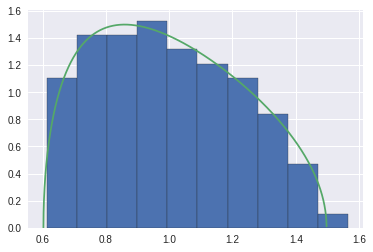

In [516]:
plt.hist(wa2, ec="k", density = True)
plt.plot(l,m)

In [517]:
def get_ipr(vector):
    return np.sum(np.power(vector,4))
    

In [518]:
iprb = []
ipra = []
for i in range(N):
    iprb.append(get_ipr(vb1[i]))
    ipra.append(get_ipr(va1[i]))

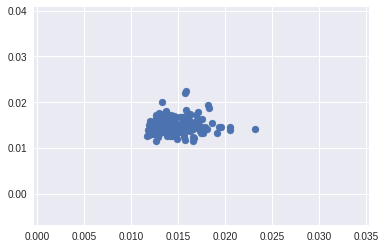

In [519]:
plt.scatter(iprb, ipra)

In [509]:
q1 = []
N = 200
for i in range(N):
    x = np.dot(va1[0], va2[i])
    q1.append(x/N)

(array([ 1.,  0.,  2., 13., 23., 48., 46., 40., 18.,  9.]),
 array([-1.36605946e-03, -1.14561437e-03, -9.25169294e-04, -7.04724213e-04,
        -4.84279132e-04, -2.63834051e-04, -4.33889696e-05,  1.77056111e-04,
         3.97501192e-04,  6.17946273e-04,  8.38391354e-04]),
 <a list of 10 Patch objects>)

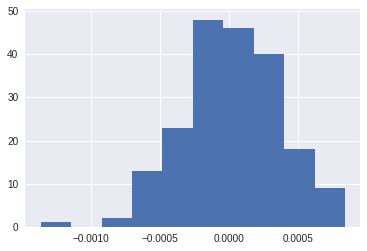

In [510]:
plt.hist(q1)

In [462]:
def compute_cov(matrix):
    c = matrix.T.dot(matrix)
    c = c/matrix.shape[0]
    return c

In [463]:
c1 = compute_cov(xi_before)
c2 = compute_cov(xi_after)

In [464]:
t1 = np.linalg.inv(c1)
t2 = np.linalg.inv(c2)

In [465]:
wt1 = np.linalg.eigvals(t1)
wt2 = np.linalg.eigvals(t2)

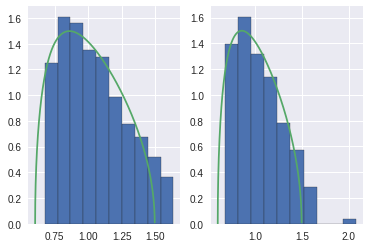

In [466]:
plt.subplot(121)
plt.hist(wt1, ec="k", density = True)
plt.plot(l,m)
plt.subplot(122)
plt.hist(wt2, ec = "k", density = True)
plt.plot(l,m)

/users/sharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


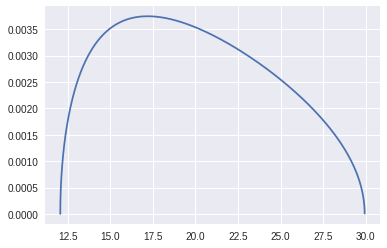

In [467]:
l2, m2 = mplaw(1./20)
plt.plot(l2, m2)

In [1]:
l,m = mplaw(1./20.0)

NameError: name 'mplaw' is not defined

In [ ]:
print np.min(l)
print np.max(l)